In [3]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")

def preview(df):
    print("Dimensions: {0} rows x {1} columns".format(df.shape[0], df.shape[1]))
    return df.head()

preview(movies)

Dimensions: 146 rows x 22 columns


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


### Histograms

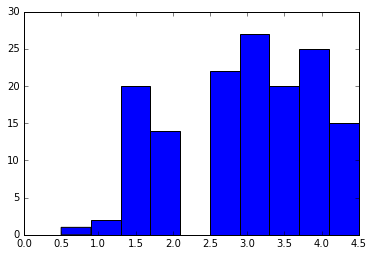

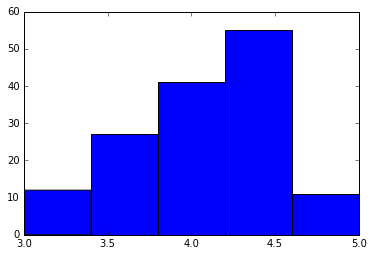

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"])
plt.show()

plt.hist(movies["Fandango_Stars"], bins=5)
plt.show()

Metacritic ranges from 0.5-4.5 while Fandango ranges from 3.0-5.0, which is pretty biased.

### Mean, median, and standard deviation

In [14]:
import numpy as np

print("Metacritic mean: {0}".format(movies["Metacritic_norm_round"].mean()))
print("Metacritic median: {0}".format(movies["Metacritic_norm_round"].median()))
print("Metacritic standard deviation: {0}".format(np.std(movies["Metacritic_norm_round"])))

print("Fandango mean: {0}".format(movies["Fandango_Stars"].mean()))
print("Fandango median: {0}".format(movies["Fandango_Stars"].median()))
print("Fandango standard deviation: {0}".format(np.std(movies["Fandango_Stars"])))

Metacritic mean: 2.97260273973
Metacritic median: 3.0
Metacritic standard deviation: 0.987561029704
Fandango mean: 4.08904109589
Fandango median: 4.0
Fandango standard deviation: 0.53853216127


### Scatter plots

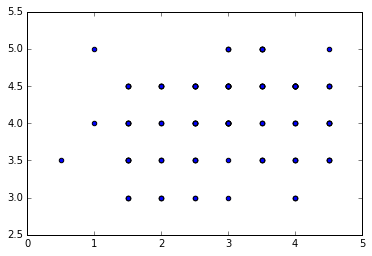

In [16]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.show()

In [21]:
movies["fm_diff"] = np.absolute(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies["fm_diff"].head()

0    1.5
1    1.5
2    2.0
3    4.0
4    2.0
Name: fm_diff, dtype: float64

In [27]:
movies.sort_values(by="fm_diff", ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


### Correlations

In [33]:
from scipy import stats

corr, p = stats.pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("Correlation: {0}".format(corr))

Correlation: 0.178449190739


In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

print("Metacritic: 3.0, predicted Fandango: {0}".format(slope * 3.0 + intercept))
print("Metacritic: 4.0, predicted Fandango: {0}".format(slope * 4.0 + intercept))

Metacritic: 3.0, predicted Fandango: 4.09170715282
Metacritic: 4.0, predicted Fandango: 4.1890182308


### Finding residuals

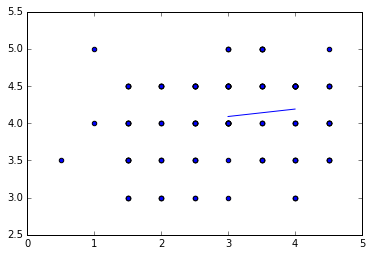

In [42]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
x = [3.0, 4.0]
y = [4.09, 4.19]
plt.plot(x, y)
plt.show()